In [2]:
import pandas as pd

df_2020 = pd.read_csv("../Nal2/university_rank_2020.csv", index_col=0, sep=",", decimal=".")
print(df_2020.shape)
df_students = pd.read_excel("../Nal2/university_rank_students.xlsx", index_col=0, sheet_name=0)
print(df_students.shape)
df_other = pd.read_csv("../Nal2/university_rank_other.csv", index_col=0, sep=" ", decimal=".")
print(df_other.shape)
df = pd.concat([df_2020, df_students, df_other], axis=1)
print(df.shape)

(1396, 5)
(1396, 3)
(1396, 5)
(1396, 13)


In [23]:
print(df["International_Outlook"].isnull().sum())
df.isnull().sum()

11


Country                       0
Number_students               0
Numb_students_per_Staff       0
Score_Result                  0
Rank                          0
International_Students(%)    38
Percentage_Female(%)         36
Percentage_Male(%)           27
Teaching                      0
Research                      0
Citations                     0
Industry_Income               0
International_Outlook        11
dtype: int64

In [24]:
df.dtypes

Country                       object
Number_students              float64
Numb_students_per_Staff      float64
Score_Result                 float64
Rank                           int64
International_Students(%)    float64
Percentage_Female(%)         float64
Percentage_Male(%)           float64
Teaching                     float64
Research                     float64
Citations                    float64
Industry_Income              float64
International_Outlook         object
dtype: object

In [25]:
stevilski = df.select_dtypes(exclude=["object"]).columns
kategoricni = df.select_dtypes(exclude=["int64", "float64"]).columns
print(stevilski, "\n", kategoricni)

Index(['Number_students', 'Numb_students_per_Staff', 'Score_Result', 'Rank',
       'International_Students(%)', 'Percentage_Female(%)',
       'Percentage_Male(%)', 'Teaching', 'Research', 'Citations',
       'Industry_Income'],
      dtype='object') 
 Index(['Country', 'International_Outlook'], dtype='object')


In [26]:
from sklearn.impute import SimpleImputer
import numpy as np

povprecje = SimpleImputer(missing_values=np.nan, strategy="mean")
df[stevilski] = povprecje.fit_transform(df[stevilski])
df.isnull().sum()

Country                       0
Number_students               0
Numb_students_per_Staff       0
Score_Result                  0
Rank                          0
International_Students(%)     0
Percentage_Female(%)          0
Percentage_Male(%)            0
Teaching                      0
Research                      0
Citations                     0
Industry_Income               0
International_Outlook        11
dtype: int64

In [27]:
najpogostejsi = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
df[kategoricni] = najpogostejsi.fit_transform(df[kategoricni])
df["International_Outlook"].isnull().sum()

0

In [28]:
df.to_csv("university_rank_no_nan.csv", sep=",", decimal=".")

In [29]:
from sklearn.model_selection import train_test_split
izhod = "International_Outlook"

x_train, x_test, y_train, y_test = train_test_split(df[stevilski], df[izhod], test_size=0.2, random_state=123)
x_train.shape

(1116, 11)

In [30]:
from sklearn.tree import DecisionTreeClassifier

drevo = DecisionTreeClassifier()
drevo.fit(x_train, y_train)
rezultat = drevo.predict(x_test)
rezultat[0:4]

array(['bad', 'good', 'good', 'good'], dtype=object)

In [31]:
from sklearn import metrics

print(metrics.accuracy_score(rezultat, y_test))
# Precision: Pove nam kolikšen je bil del True Positiv med vsemi pozitivnimi predikcijami, pove nam kako točen je bil
print(metrics.precision_score(y_test, rezultat, average='macro'))
# Recall: Kolikšen del je bil True Positiv med vsemi dejanskimi pozitivnimi, nakaže zmožnost ugotavljanja vseh dejansko pozitivnih
print(metrics.recall_score(y_test, rezultat, average='macro'))
# F1-score: Mediana med precision in recall. 
print(metrics.f1_score(y_test, rezultat, average='macro'))

0.9928571428571429
0.9945110087045571
0.9724542124542125
0.9829601029601029


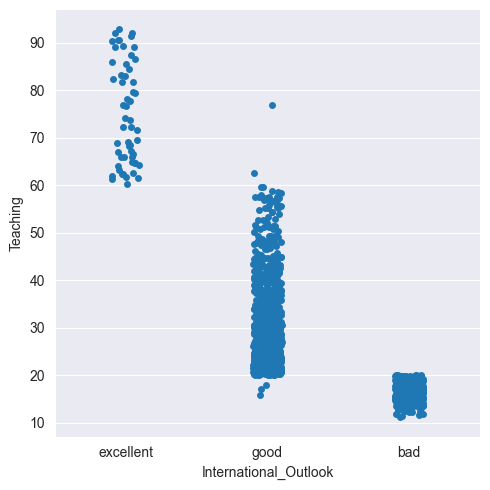

In [32]:
import seaborn as sns

sns.catplot(data=df, x='International_Outlook', y='Teaching')

In [33]:
vhod = ["Industry_Income", "Citations", "Research", "Percentage_Male(%)", "Percentage_Female(%)", "International_Students(%)", "Score_Result", "Numb_students_per_Staff", "Number_students"]

x_train, x_test, y_train, y_test = train_test_split(df[vhod], df[izhod], test_size=0.2, random_state=123)
x_train.shape

(1116, 9)

In [34]:
drevo_dva = DecisionTreeClassifier()
drevo_dva.fit(x_train, y_train)
rezultat = drevo_dva.predict(x_test)
rezultat[0:4]

array(['bad', 'good', 'good', 'good'], dtype=object)

In [35]:
print(metrics.accuracy_score(rezultat, y_test))

0.7821428571428571


In [36]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

klasifikatorji = [DecisionTreeClassifier(), LogisticRegression(max_iter=5000), KNeighborsClassifier(), LinearSVC(dual=False, max_iter=5000), GaussianNB(), RandomForestClassifier(), ExtraTreesClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]

imena_klasifikatorjev = []
rezultati = []

for k in klasifikatorji:
    kfold = StratifiedKFold(n_splits=8)
    rez = cross_val_score(k, df[stevilski], df[izhod], cv=kfold, scoring="accuracy")
    
    print(type(k).__name__, rez.mean())
    rezultati.append(rez.mean())
    imena_klasifikatorjev.append(type(k).__name__)

DecisionTreeClassifier 0.967828407224959
LogisticRegression 0.9227627257799672
KNeighborsClassifier 0.5314039408866995
LinearSVC 0.936256157635468
GaussianNB 0.7914860426929393
RandomForestClassifier 0.8811453201970443
ExtraTreesClassifier 0.7643349753694582
AdaBoostClassifier 0.9469047619047619
GradientBoostingClassifier 0.974983579638752


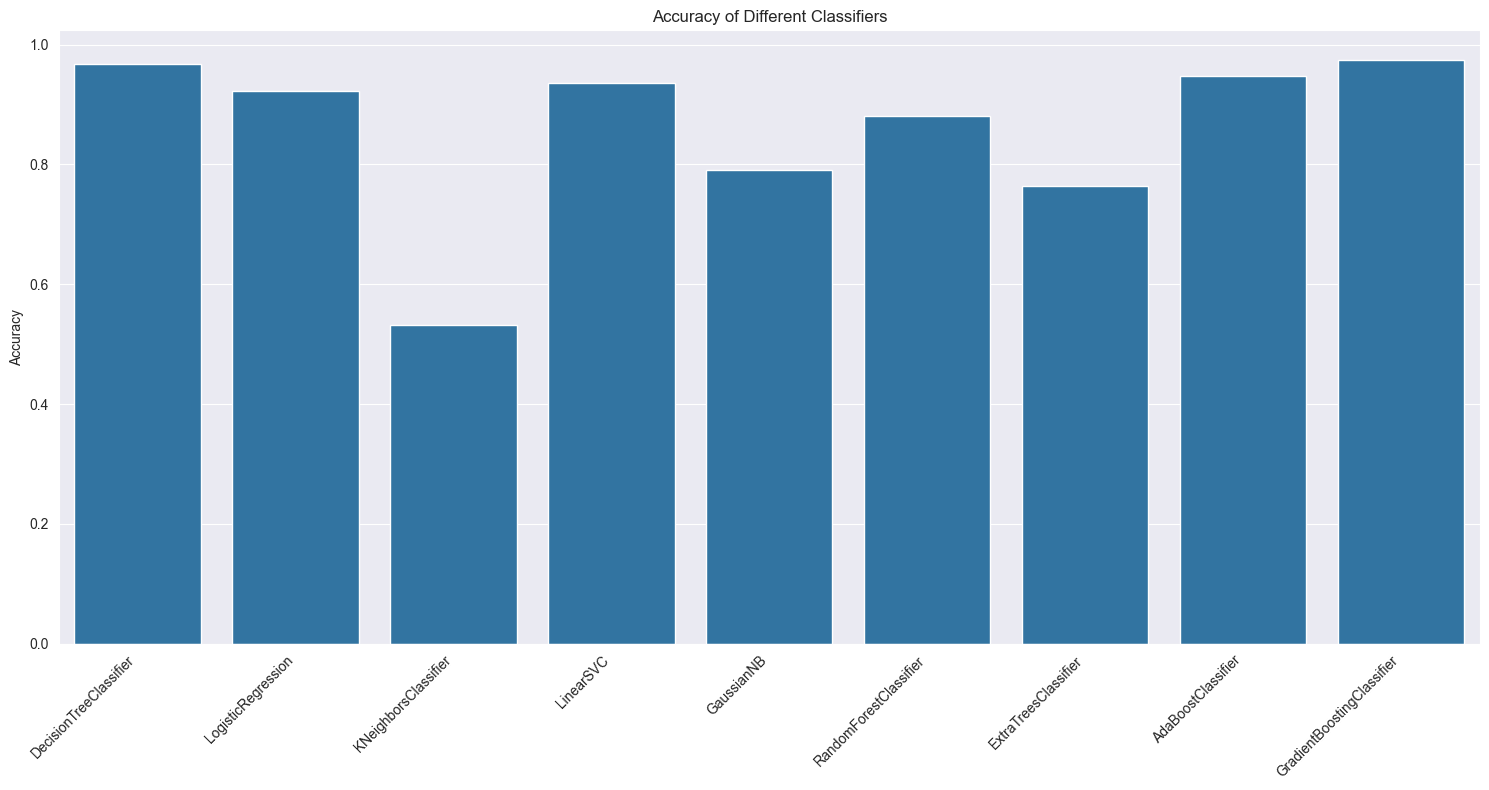

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.barplot(x=imena_klasifikatorjev, y=rezultati)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.tight_layout()
plt.show()